In [5]:
import pandas as pd
import numpy as np
import random

# Define number of samples
num_samples = 500  # Adjust as needed

# Possible reactants and products
reactants = ["A + B", "X + Y", "M + N", "C + D", "P + Q"]
products = ["C", "Z", "O", "E", "R"]
catalysts = ["None", "CuO", "ZnCl2", "Fe2O3", "Ni"]
crystal_structures = ["Amorphous", "Cubic", "Tetragonal", "Hexagonal", "Orthorhombic"]

# Generate synthetic data
data = {
    "Reactants": np.random.choice(reactants, num_samples),
    "Product": np.random.choice(products, num_samples),
    "Temperature (°C)": np.random.randint(50, 300, num_samples),  # Temp range 50-300°C
    "Pressure (atm)": np.round(np.random.uniform(0.5, 5, num_samples), 2),  # Pressure 0.5-5 atm
    "Reaction Time (min)": np.random.randint(30, 300, num_samples),  # Time range 30-300 min
    "Solvent Used (mL/g)": np.round(np.random.uniform(0, 10, num_samples), 2),  # 0-10 mL/g
    "Reaction Yield (%)": np.random.randint(50, 100, num_samples),  # Yield 50-100%
    "Catalyst Used": np.random.choice(catalysts, num_samples),
    "Crystal Structure": np.random.choice(crystal_structures, num_samples)
}

# Calculate efficiency as a function of yield and solvent use
data["Reaction Efficiency (%)"] = [
    round((yield_val / (solvent + 1)) * 100, 2) for yield_val, solvent in zip(data["Reaction Yield (%)"], data["Solvent Used (mL/g)"])
]

# Create DataFrame
df = pd.DataFrame(data)

# Save dataset to CSV
df.to_csv("solid_state_reaction_large.csv", index=False)

# Display first few rows
print(df.head())

  Reactants Product  Temperature (°C)  Pressure (atm)  Reaction Time (min)  \
0     A + B       Z               287            3.91                  295   
1     C + D       Z               257            1.57                  248   
2     P + Q       R               265            4.69                  119   
3     C + D       E                87            4.91                  142   
4     M + N       C               275            2.87                  173   

   Solvent Used (mL/g)  Reaction Yield (%) Catalyst Used Crystal Structure  \
0                 7.86                  73           CuO        Tetragonal   
1                 8.03                  64           CuO        Tetragonal   
2                 8.23                  75         ZnCl2        Tetragonal   
3                 2.71                  58         Fe2O3      Orthorhombic   
4                 8.13                  97            Ni         Amorphous   

   Reaction Efficiency (%)  
0                   823.93  
1   

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("solid_state_reaction_large.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Get dataset summary
print("\nDataset Summary:")
print(df.describe())


  Reactants Product  Temperature (°C)  Pressure (atm)  Reaction Time (min)  \
0     A + B       Z               287            3.91                  295   
1     C + D       Z               257            1.57                  248   
2     P + Q       R               265            4.69                  119   
3     C + D       E                87            4.91                  142   
4     M + N       C               275            2.87                  173   

   Solvent Used (mL/g)  Reaction Yield (%) Catalyst Used Crystal Structure  \
0                 7.86                  73           CuO        Tetragonal   
1                 8.03                  64           CuO        Tetragonal   
2                 8.23                  75         ZnCl2        Tetragonal   
3                 2.71                  58         Fe2O3      Orthorhombic   
4                 8.13                  97            Ni         Amorphous   

   Reaction Efficiency (%)  
0                   823.93  
1   

In [7]:
print(df.head())

  Reactants Product  Temperature (°C)  Pressure (atm)  Reaction Time (min)  \
0     A + B       Z               287            3.91                  295   
1     C + D       Z               257            1.57                  248   
2     P + Q       R               265            4.69                  119   
3     C + D       E                87            4.91                  142   
4     M + N       C               275            2.87                  173   

   Solvent Used (mL/g)  Reaction Yield (%) Catalyst Used Crystal Structure  \
0                 7.86                  73           CuO        Tetragonal   
1                 8.03                  64           CuO        Tetragonal   
2                 8.23                  75         ZnCl2        Tetragonal   
3                 2.71                  58         Fe2O3      Orthorhombic   
4                 8.13                  97            Ni         Amorphous   

   Reaction Efficiency (%)  
0                   823.93  
1   

C:\Users\SHOOT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


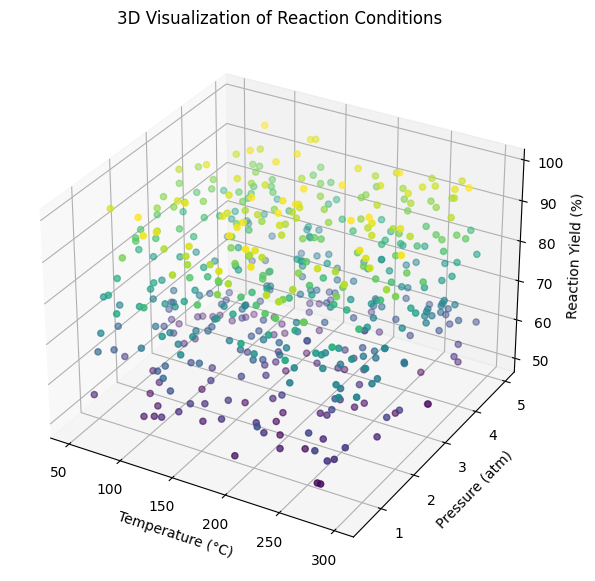

C:\Users\SHOOT\AppData\Local\Temp\ipykernel_16976\1502125955.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Crystal Structure", data=df, palette="coolwarm")


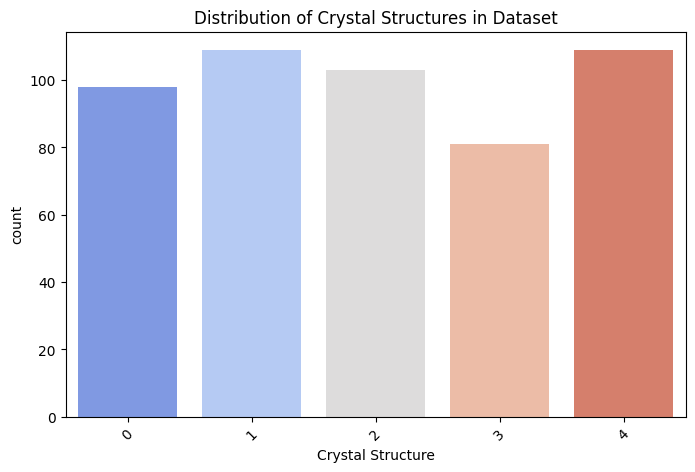

Random Forest - Mean Absolute Error: 13.034499999999998, R-squared Score: -0.1426163636861575
MLP Regressor - Mean Absolute Error: 14.568396416498047, R-squared Score: -0.40446225813194725
   Reactants  Product  Temperature (°C)  Pressure (atm)  Reaction Time (min)  \
0          0        4               287            3.91                  295   
1          1        4               257            1.57                  248   
2          3        3               265            4.69                  119   
3          1        1                87            4.91                  142   
4          2        0               275            2.87                  173   

   Solvent Used (mL/g)  Reaction Yield (%)  Catalyst Used  Crystal Structure  \
0                 7.86                  73              0                  4   
1                 8.03                  64              0                  4   
2                 8.23                  75              3                  4   
3         

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("solid_state_reaction_large.csv")

# Encode categorical variables
label_encoders = {}
for col in ["Reactants", "Product", "Catalyst Used", "Crystal Structure"]:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Reaction Yield (%)", "Reaction Efficiency (%)"])
y = df["Reaction Yield (%)"]  # Predicting reaction yield

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train an MLP Regressor (Neural Network) model
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

# Visualization: 3D scatter plot of Temperature, Pressure, and Reaction Yield
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Temperature (°C)"], df["Pressure (atm)"], df["Reaction Yield (%)"], c=df["Reaction Yield (%)"], cmap='viridis', marker='o')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Pressure (atm)')
ax.set_zlabel('Reaction Yield (%)')
ax.set_title('3D Visualization of Reaction Conditions')
plt.show()

# Crystal Structure Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Crystal Structure", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribution of Crystal Structures in Dataset")
plt.show()

# Display results
print(f"Random Forest - Mean Absolute Error: {rf_mae}, R-squared Score: {rf_r2}")
print(f"MLP Regressor - Mean Absolute Error: {mlp_mae}, R-squared Score: {mlp_r2}")
print(df.head())


Fitting 3 folds for each of 81 candidates, totalling 243 fits


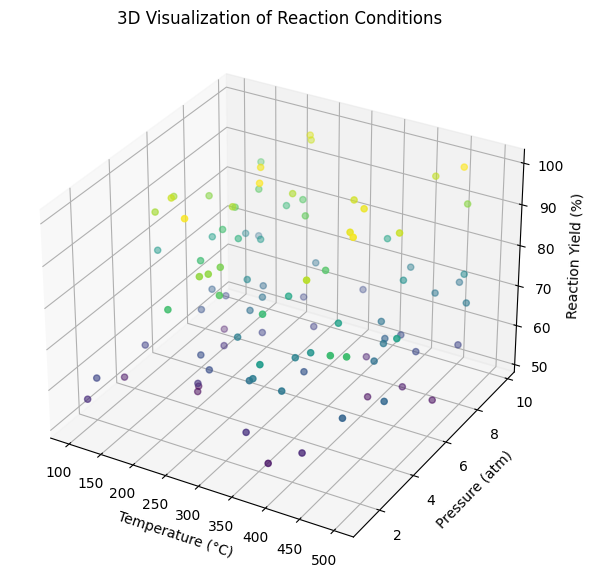

C:\Users\SHOOT\AppData\Local\Temp\ipykernel_16976\4132695003.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Crystal Structure", data=df, palette="coolwarm")


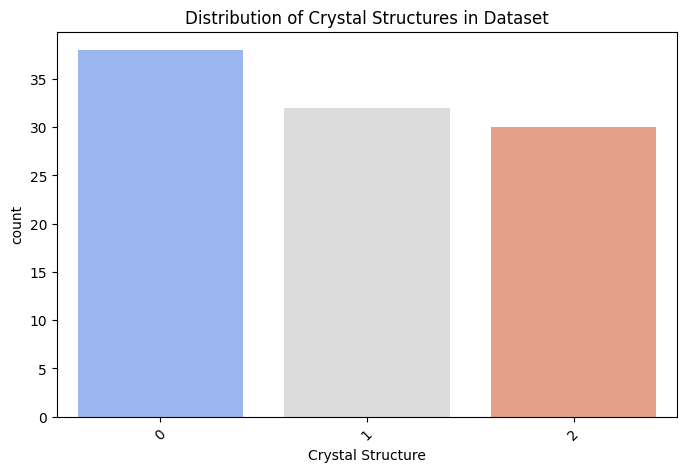

Optimized Random Forest - Mean Absolute Error: 10.057559010190896, R-squared Score: -0.0814150136909475
Optimized MLP Regressor - Mean Absolute Error: 13.439756824120428, R-squared Score: -1.0019976508574673
   Reactants  Product  Catalyst Used  Crystal Structure  Temperature (°C)  \
0          2        2              1                  0               226   
1          3        1              1                  1               254   
2          0        1              2                  0               485   
3          2        1              1                  1               372   
4          2        1              2                  0               203   

   Pressure (atm)  Reaction Yield (%)  Reaction Efficiency (%)  
0        6.744435           98.712410                87.072444  
1        5.650266           99.796562                71.905355  
2        6.914002           52.793558                71.104656  
3        4.921056           86.851778                74.015564  
4   

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
np.random.seed(42)
data = {
    "Reactants": np.random.choice(["A", "B", "C", "D"], 100),
    "Product": np.random.choice(["X", "Y", "Z"], 100),
    "Catalyst Used": np.random.choice(["Cat1", "Cat2", "Cat3"], 100),
    "Crystal Structure": np.random.choice(["Cubic", "Hexagonal", "Tetragonal"], 100),
    "Temperature (°C)": np.random.randint(100, 500, 100),
    "Pressure (atm)": np.random.uniform(1, 10, 100),
    "Reaction Yield (%)": np.random.uniform(50, 100, 100),
    "Reaction Efficiency (%)": np.random.uniform(70, 100, 100)
}
df = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
for col in ["Reactants", "Product", "Catalyst Used", "Crystal Structure"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Reaction Yield (%)", "Reaction Efficiency (%)"])
y = df["Reaction Yield (%)"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
rf_model = grid_search.best_estimator_

# Train an optimized MLP Regressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

# Visualization: 3D scatter plot of Temperature, Pressure, and Reaction Yield
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Temperature (°C)"], df["Pressure (atm)"], df["Reaction Yield (%)"], c=df["Reaction Yield (%)"], cmap='viridis', marker='o')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Pressure (atm)')
ax.set_zlabel('Reaction Yield (%)')
ax.set_title('3D Visualization of Reaction Conditions')
plt.show()

# Crystal Structure Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Crystal Structure", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribution of Crystal Structures in Dataset")
plt.show()

# Display results
print(f"Optimized Random Forest - Mean Absolute Error: {rf_mae}, R-squared Score: {rf_r2}")
print(f"Optimized MLP Regressor - Mean Absolute Error: {mlp_mae}, R-squared Score: {mlp_r2}")
print(df.head())


In [11]:
# Show predictions for a few samples
sample_data = X_test[:5]
sample_rf_pred = rf_model.predict(sample_data)
sample_mlp_pred = mlp_model.predict(sample_data)

print("Sample Predictions:")
for i in range(len(sample_data)):
    print(f"Sample {i+1} - Random Forest Prediction: {sample_rf_pred[i]:.2f}, MLP Prediction: {sample_mlp_pred[i]:.2f}")


Sample Predictions:
Sample 1 - Random Forest Prediction: 76.74, MLP Prediction: 92.10
Sample 2 - Random Forest Prediction: 77.46, MLP Prediction: 73.67
Sample 3 - Random Forest Prediction: 74.37, MLP Prediction: 73.59
Sample 4 - Random Forest Prediction: 79.96, MLP Prediction: 57.24
Sample 5 - Random Forest Prediction: 80.97, MLP Prediction: 77.34


Random Forest - MAE: 13.72452878235346, R² Score: -0.23402083819181718


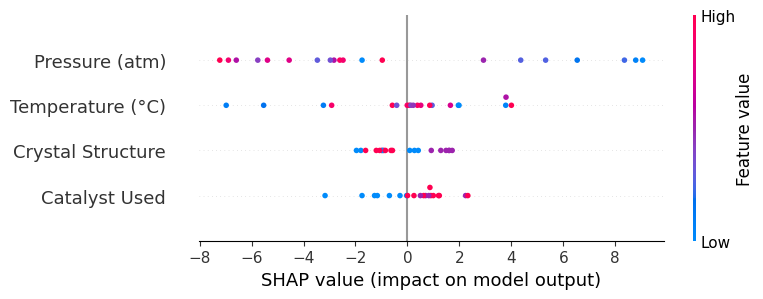

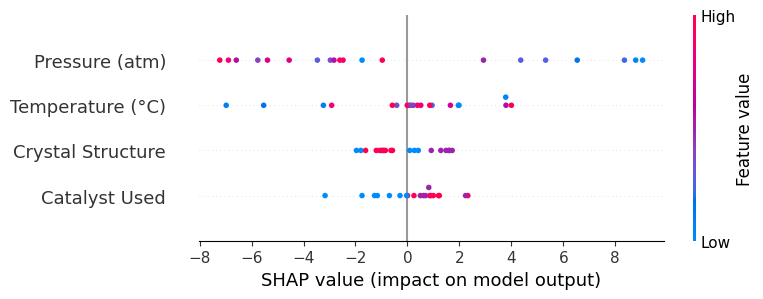

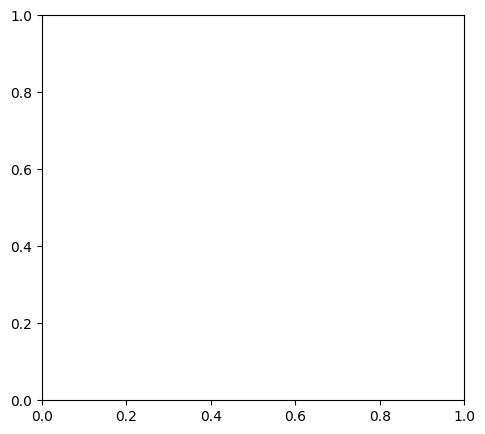

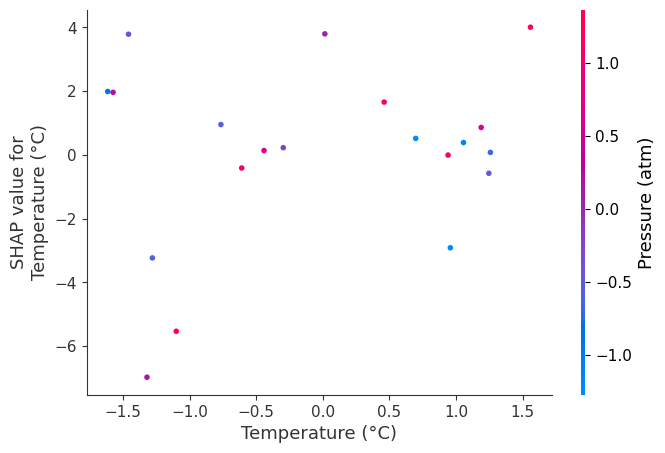

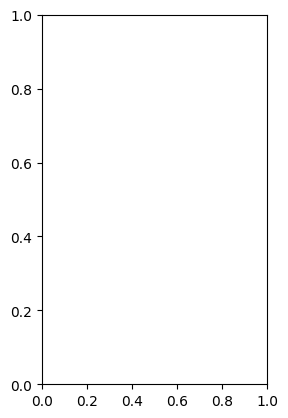

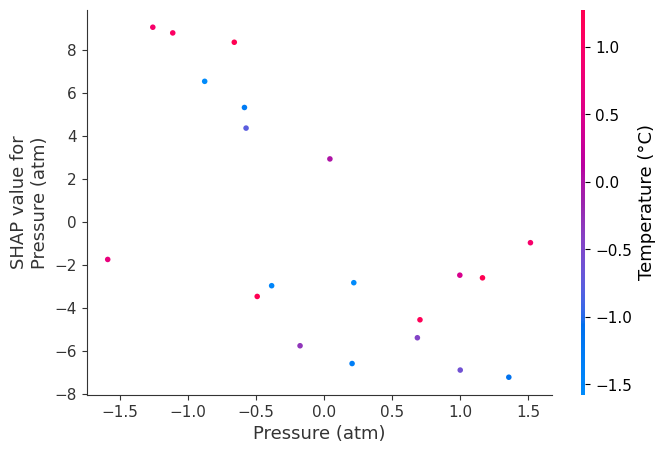

In [13]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Sample dataset
np.random.seed(42)
data = {
    "Temperature (°C)": np.random.randint(200, 800, 100),
    "Pressure (atm)": np.random.uniform(1, 20, 100),
    "Catalyst Used": np.random.choice(["Catalyst A", "Catalyst B", "Catalyst C"], 100),
    "Crystal Structure": np.random.choice(["Structure X", "Structure Y", "Structure Z"], 100),
    "Reaction Yield (%)": np.random.uniform(50, 100, 100)
}
df = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
for col in ["Catalyst Used", "Crystal Structure"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Reaction Yield (%)"])
y = df["Reaction Yield (%)"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions & evaluation
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - MAE: {rf_mae}, R² Score: {rf_r2}")

# SHAP Explanation
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test).values  # Convert to NumPy array
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


# Plot SHAP Summary (Feature Importance)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Partial Dependence Plots for Temperature & Pressure
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
shap.dependence_plot(0, shap_values, X_test, feature_names=X.columns)  # Temperature
plt.subplot(1, 2, 2)
shap.dependence_plot(1, shap_values, X_test, feature_names=X.columns)  # Pressure
plt.show()


In [14]:
import joblib

joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fit


🔹 Optimized Parameters for Maximum Gasoline Yield:
Temperature: 539.08
Catalyst_to_Oil_Ratio: 7.00
Residence_Time: 6.00
🚀 Expected Gasoline Yield: 54.91%


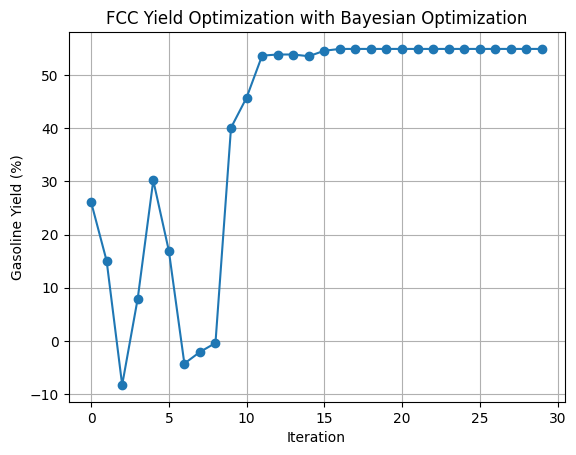

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

# 📌 Simulated dataset for FCC process
np.random.seed(42)
data = pd.DataFrame({
    "Temperature": np.random.uniform(450, 550, 100),  # °C
    "Catalyst_to_Oil_Ratio": np.random.uniform(4, 7, 100),  # wt/wt
    "Residence_Time": np.random.uniform(1, 6, 100),  # sec
})
data["Gasoline_Yield"] = (
    0.4 * np.tanh((data["Temperature"] - 500) / 50) +
    0.3 * np.tanh((data["Catalyst_to_Oil_Ratio"] - 5) / 1.5) +
    0.2 * np.tanh((data["Residence_Time"] - 3) / 2) +
    np.random.normal(0, 0.02, 100)
) * 100  # Convert to percentage

# 📌 Train a predictive model (Random Forest)
X = data[["Temperature", "Catalyst_to_Oil_Ratio", "Residence_Time"]]
y = data["Gasoline_Yield"]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 📌 Define parameter search space
space = [
    Real(450, 550, name="Temperature"),
    Real(4, 7, name="Catalyst_to_Oil_Ratio"),
    Real(1, 6, name="Residence_Time"),
]

# 📌 Define optimization function
@use_named_args(space)
def objective(**params):
    X_new = np.array([[params["Temperature"], params["Catalyst_to_Oil_Ratio"], params["Residence_Time"]]])
    return -model.predict(X_new)[0]  # Minimize negative gasoline yield

# 📌 Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=30, random_state=42)

# 📌 Best parameters & yield
best_params = dict(zip(["Temperature", "Catalyst_to_Oil_Ratio", "Residence_Time"], res.x))
best_yield = -res.fun  # Convert back to positive yield

print("\n🔹 Optimized Parameters for Maximum Gasoline Yield:")
for key, value in best_params.items():
    print(f"{key}: {value:.2f}")
print(f"🚀 Expected Gasoline Yield: {best_yield:.2f}%")

# 📊 Plot optimization convergence
plt.plot(-np.array(res.func_vals), marker='o')
plt.xlabel("Iteration")
plt.ylabel("Gasoline Yield (%)")
plt.title("FCC Yield Optimization with Bayesian Optimization")
plt.grid()
plt.show()


C:\Users\SHOOT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


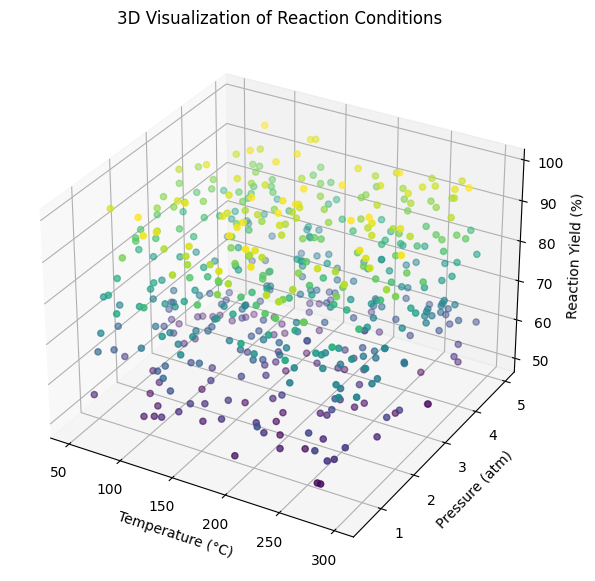

C:\Users\SHOOT\AppData\Local\Temp\ipykernel_17256\1502125955.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Crystal Structure", data=df, palette="coolwarm")


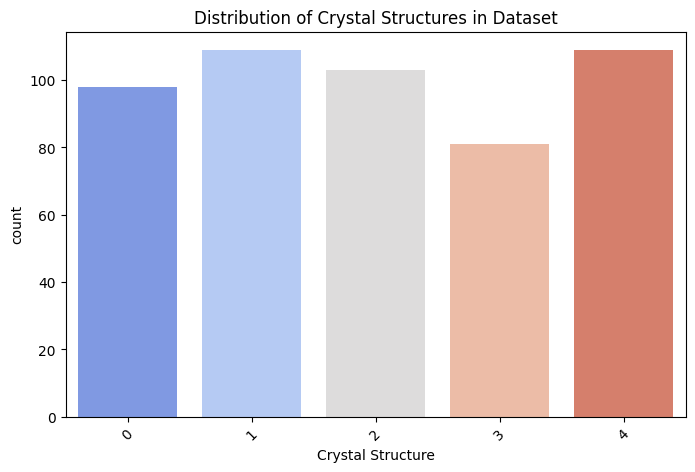

Random Forest - Mean Absolute Error: 13.034499999999998, R-squared Score: -0.1426163636861575
MLP Regressor - Mean Absolute Error: 14.568396416498047, R-squared Score: -0.40446225813194725
   Reactants  Product  Temperature (°C)  Pressure (atm)  Reaction Time (min)  \
0          0        4               287            3.91                  295   
1          1        4               257            1.57                  248   
2          3        3               265            4.69                  119   
3          1        1                87            4.91                  142   
4          2        0               275            2.87                  173   

   Solvent Used (mL/g)  Reaction Yield (%)  Catalyst Used  Crystal Structure  \
0                 7.86                  73              0                  4   
1                 8.03                  64              0                  4   
2                 8.23                  75              3                  4   
3         

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("solid_state_reaction_large.csv")

# Encode categorical variables
label_encoders = {}
for col in ["Reactants", "Product", "Catalyst Used", "Crystal Structure"]:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Reaction Yield (%)", "Reaction Efficiency (%)"])
y = df["Reaction Yield (%)"]  # Predicting reaction yield

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train an MLP Regressor (Neural Network) model
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

# Visualization: 3D scatter plot of Temperature, Pressure, and Reaction Yield
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Temperature (°C)"], df["Pressure (atm)"], df["Reaction Yield (%)"], c=df["Reaction Yield (%)"], cmap='viridis', marker='o')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Pressure (atm)')
ax.set_zlabel('Reaction Yield (%)')
ax.set_title('3D Visualization of Reaction Conditions')
plt.show()

# Crystal Structure Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Crystal Structure", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribution of Crystal Structures in Dataset")
plt.show()

# Display results
print(f"Random Forest - Mean Absolute Error: {rf_mae}, R-squared Score: {rf_r2}")
print(f"MLP Regressor - Mean Absolute Error: {mlp_mae}, R-squared Score: {mlp_r2}")
print(df.head())
